# Phase 4: Visualizing Housing Data on Maps

This notebook leverages the geographical coordinates (latitude and longitude) from the Beijing housing dataset to visualize property locations and characteristics on a map. Using Matplotlib and Seaborn, we’ll create professional plots to analyze spatial patterns, including property density, price gradients, and district-wise comparisons. These visualizations offer insights into market trends and regional variations.

## Dataset Loading

Load the extended dataset `housing_extended.csv` from the previous phase, which includes geospatial and derived features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load dataset
try:
    housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
    logger.info(f"Dataset loaded successfully. Shape: {housing_extended.shape}")
except FileNotFoundError:
    logger.error("File 'housing_extended.csv' not found.")
    raise

# Sample 1% of data for efficiency
housing_sample = housing_extended.iloc[::100]
logger.info(f"Sampled dataset shape: {housing_sample.shape}")

housing_sample.head()

2025-04-09 23:49:45,504 - INFO - Dataset loaded successfully. Shape: (285040, 20)
2025-04-09 23:49:45,506 - INFO - Sampled dataset shape: (2851, 20)


Lng        Lat   tradeTime     DOM  totalPrice  square  \
0    116.475489  40.019520  2016-08-09  1464.0       415.0  131.00   
100  116.456102  39.931183  2016-07-07   400.0       345.0   60.90   
200  116.560906  39.879298  2016-08-07   351.0       450.0  168.83   
300  116.421128  40.068301  2016-07-20   286.0       132.5   61.00   
400  116.511520  39.901436  2016-09-09   304.0       375.0   91.46   

     livingRoom  drawingRoom  kitchen  bathRoom  floor  constructionTime  \
0             2            1        1         1     26              2005   
100           2            1        1         1      5              1976   
200           4            2        1         3      6              2000   
300           1            0        1         1     10              2008   
400           2            1        1         1     25              2005   

    renovationCondition         buildingStructure  ladderRatio      elevator  \
0            Simplicity  steel-concrete composite        0.217  has elevator   
100          Simplicity                     mixed        0.333   no elevator   
200           hardcover                     mixed        0.500   no elevator   
300           hardcover  steel-concrete composite        0.174  has elevator   
400               other  steel-concrete composite        0.667  has elevator   

         subway  district  distanceToCapital  pricePerSquare  
0    has subway         7          14.074996     3167.938931  
100  has subway         7           5.123809     5665.024631  
200   no subway         7          13.385926     2665.403068  
300  has subway         6          18.284669     2172.131148  
400   no subway         7           8.886906     4100.153072

## Part 1: Basic Scatter Plot with Map Overlay

Plot property locations on a Beijing map, filtering for properties 10-30 km from the capital. Use `square` for marker size and `district` for color to highlight spatial distribution and regional clustering.

2025-04-09 23:56:13,959 - INFO - Filtered sample shape: (1605, 20)
2025-04-09 23:56:13,973 - INFO - Beijing map image loaded successfully.


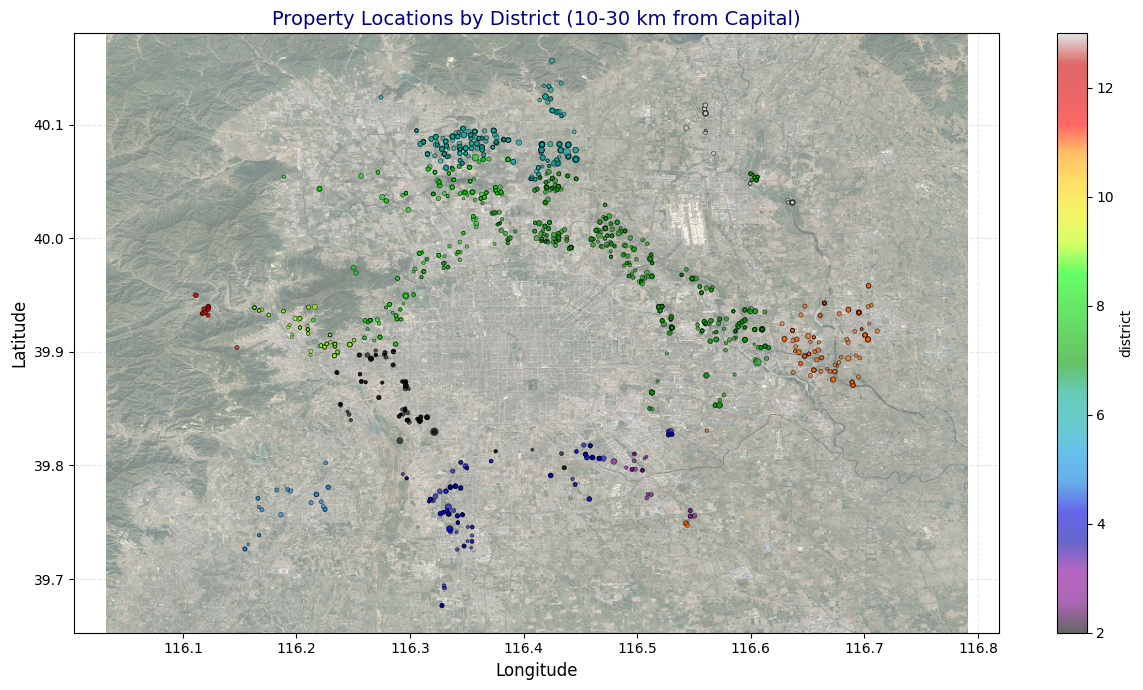

In [11]:
# Filter data
filtered_sample = housing_sample[(housing_sample['distanceToCapital'] > 10) & (housing_sample['distanceToCapital'] < 30)]
logger.info(f"Filtered sample shape: {filtered_sample.shape}")

# Load map image
try:
    beijing_img = mpimg.imread('map2.jpg')
    logger.info("Beijing map image loaded successfully.")
except FileNotFoundError:
    logger.error("Map image 'map2.jpg' not found.")
    raise

# Create scatter plot
fig1, ax1 = plt.subplots(figsize=(12.5, 7))
ax1.axis('equal')

scatter = filtered_sample.plot(
    x='Lng', y='Lat', kind='scatter', ax=ax1,
    s=filtered_sample['square'] / 10, c='district',
    cmap = plt.get_cmap('nipy_spectral'), alpha=0.6,
    edgecolor='black', linewidth=0.5
)

# Overlay map
ax1.imshow(beijing_img, extent=[ax1.get_xlim()[0], ax1.get_xlim()[1], ax1.get_ylim()[0], ax1.get_ylim()[1]], alpha=0.5)

# Customize plot
ax1.set_title('Property Locations by District (10-30 km from Capital)', fontsize=14, color='darkblue')
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
#plt.colorbar(scatter, ax=ax1, label='District')
ax1.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

## Part 2: Heatmap of Property Density

Generate a heatmap to visualize property density across Beijing, overlaid on the map. This highlights high-concentration areas.

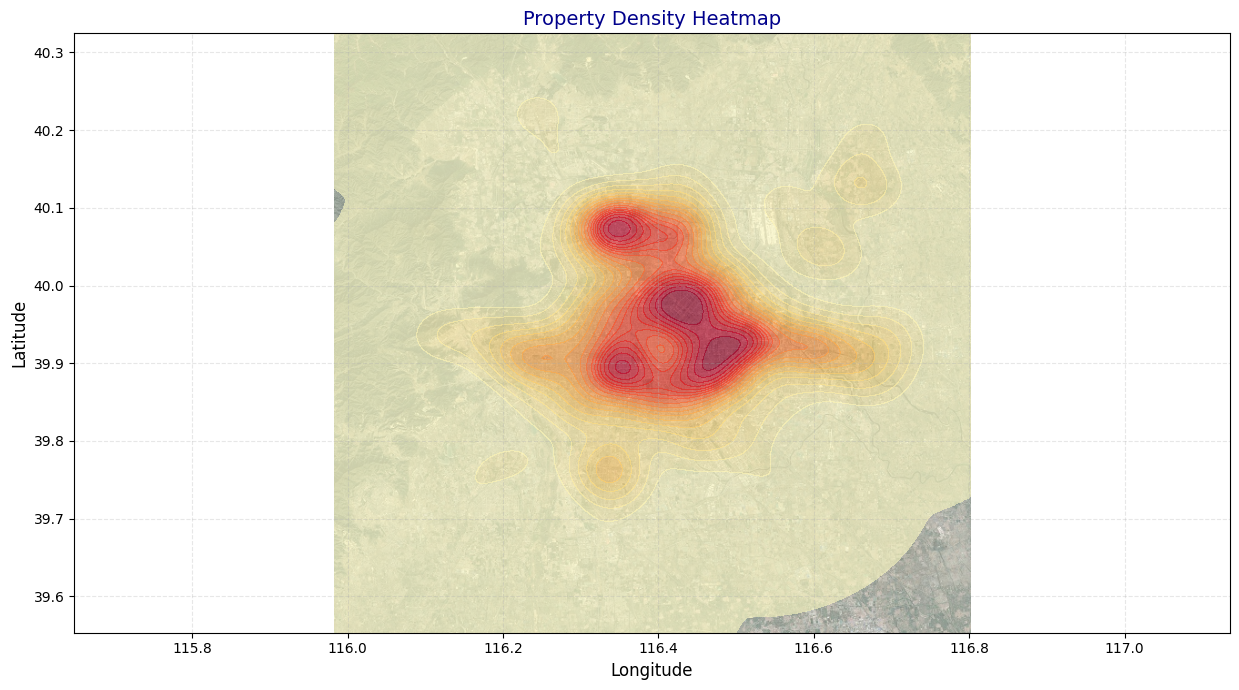

In [5]:
# Create heatmap
fig2, ax2 = plt.subplots(figsize=(12.5, 7))
ax2.axis('equal')

sns.kdeplot(
    data=housing_sample, x='Lng', y='Lat', ax=ax2,
    cmap='YlOrRd', fill=True, alpha=0.6,
    levels=20, thresh=0
)

# Overlay map
ax2.imshow(beijing_img, extent=[ax2.get_xlim()[0], ax2.get_xlim()[1], ax2.get_ylim()[0], ax2.get_ylim()[1]], alpha=0.5)

# Customize plot
ax2.set_title('Property Density Heatmap', fontsize=14, color='darkblue')
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

## Part 3: Price Gradient Map

Visualize `pricePerSquare` as a color gradient on a scatter plot to explore how property prices vary spatially.

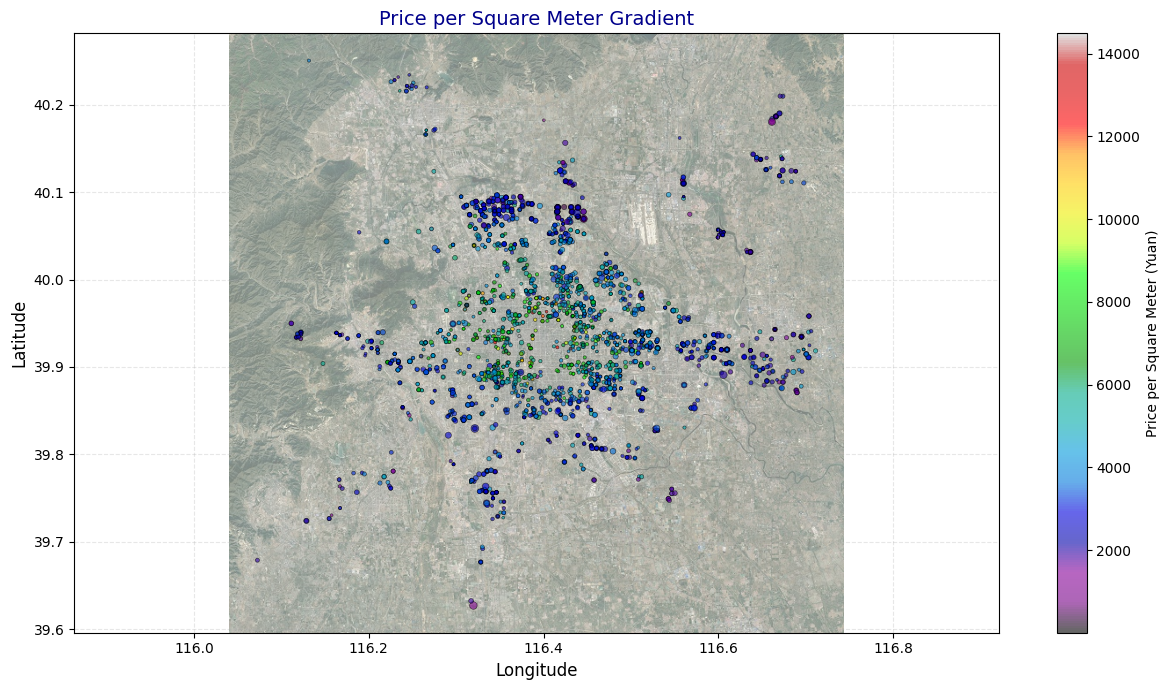

In [12]:
# Create price gradient scatter plot
fig3, ax3 = plt.subplots(figsize=(12.5, 7))
ax3.axis('equal')

scatter = ax3.scatter(
    housing_sample['Lng'], housing_sample['Lat'],
    c=housing_sample['pricePerSquare'], s=housing_sample['square'] / 10,
    cmap = plt.get_cmap('nipy_spectral'), alpha=0.6, edgecolor='black', linewidth=0.5
)

# Overlay map
ax3.imshow(beijing_img, extent=[ax3.get_xlim()[0], ax3.get_xlim()[1], ax3.get_ylim()[0], ax3.get_ylim()[1]], alpha=0.5)

# Customize plot
ax3.set_title('Price per Square Meter Gradient', fontsize=14, color='darkblue')
ax3.set_xlabel('Longitude', fontsize=12)
ax3.set_ylabel('Latitude', fontsize=12)
plt.colorbar(scatter, ax=ax3, label='Price per Square Meter (Yuan)')
ax3.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

## Part 4: District-wise Price Comparison

Use a boxplot to compare `pricePerSquare` across districts, revealing pricing trends and outliers.

2025-04-09 23:53:05,206 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\MSI\AppData\Local\Temp\ipykernel_19460\36937206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
2025-04-09 23:53:05,231 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


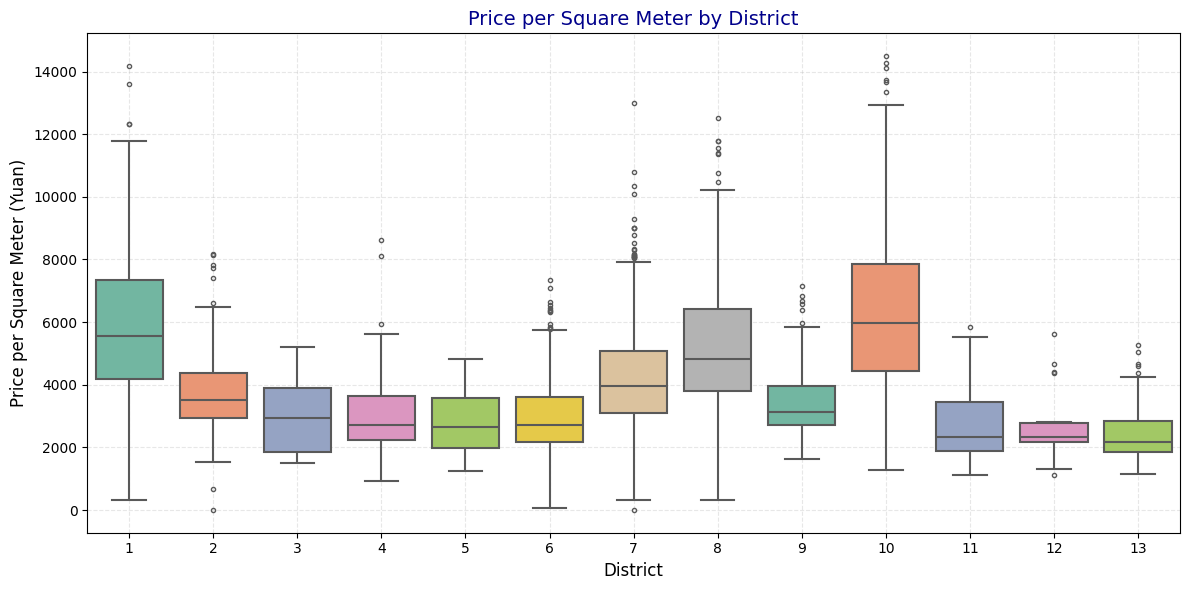

In [7]:
# Create boxplot
fig4, ax4 = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=housing_sample, x='district', y='pricePerSquare', ax=ax4,
    palette='Set2', fliersize=3, linewidth=1.5
)

# Customize plot
ax4.set_title('Price per Square Meter by District', fontsize=14, color='darkblue')
ax4.set_xlabel('District', fontsize=12)
ax4.set_ylabel('Price per Square Meter (Yuan)', fontsize=12)
ax4.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

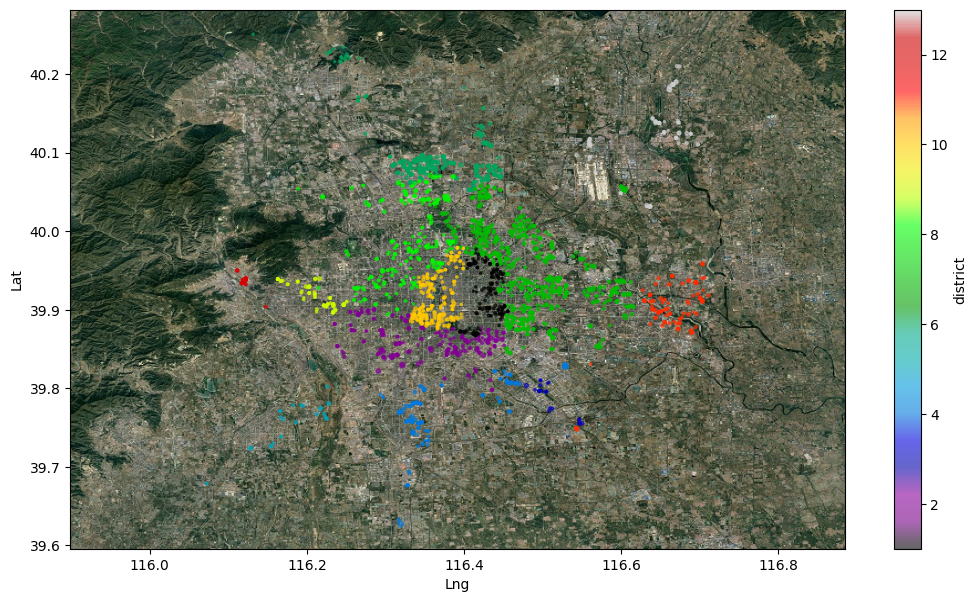

In [13]:
fig5, ax5 = plt.subplots(figsize = (12.5, 7))

ax5.axis("equal")

housing_sample.plot(x = "Lng", y = "Lat", c = "district", kind = "scatter",
                    s = (housing_sample["square"] / 20) , cmap = plt.get_cmap('nipy_spectral'), ax = ax5, alpha = 0.6)

ax5.imshow(beijing_img , extent = [ax5.get_xlim()[0], ax5.get_xlim()[1], ax5.get_ylim()[0], ax5.get_ylim()[1]]);

## Submission Preparation

Save figures and compress them into `result.zip` for submission.

In [ ]:
import zipfile
import joblib

# Save figures
joblib.dump(fig1, 'fig1_scatter_map')
joblib.dump(fig2, 'fig2_density_map')
joblib.dump(fig3, 'fig3_price_map')
joblib.dump(fig4, 'fig4_district_boxplot')

# Compress files
file_names = ['fig1_scatter_map', 'fig2_density_map', 'fig3_price_map', 'fig4_district_boxplot', '4_show_on_map.ipynb']
with zipfile.ZipFile('result.zip', 'w', compression=zipfile.ZIP_DEFLATED) as zf:
    for file in file_names:
        zf.write(file)
logger.info("Submission files compressed into 'result.zip'")